## Лабораторная работа №1 | Вариант 5

Выполнил: Фоменко А.С.

Академичская группа: М8О-311Б-23

### 1. Numpy

In [1]:
import numpy as np

1. Создайте единичную матрицу размером 3х3

In [2]:
matrix = np.eye(3)
print(matrix)

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


2. Создайте кастомный dtype который описывает цвет состоящий из 4х unsigned bytes(RGBA пиксель)

In [3]:
color_dtype = np.dtype([('r', np.uint8), ('g', np.uint8), ('b', np.uint8), ('a', np.uint8)])
print(color_dtype)

[('r', 'u1'), ('g', 'u1'), ('b', 'u1'), ('a', 'u1')]


3. Как игнорировать все numpy warnings(не рекомендуем к использованию)?

In [4]:
np.seterr(all='ignore')

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

4. Создайте случайный вектор размера 10 и отсортируйте его

In [5]:
vec = np.random.rand(10)
vec.sort()
print(vec)

[0.01936107 0.02336772 0.06613664 0.29295115 0.32476489 0.35164768
 0.7151417  0.78488927 0.95039196 0.97612849]


5. Создайте read-only массив(неизменяемый)

In [6]:
arr = np.array([1, 2, 3, 4, 5])
arr.flags.writeable = False
print(arr)

[1 2 3 4 5]


6. Рассмотрим случайную матрицу размером 10х2, представляющую декартовы координаты, преобразуем их в полярные координаты

In [7]:
cartesian = np.random.rand(10, 2)
x, y = cartesian[:, 0], cartesian[:, 1]
r = np.sqrt(x**2 + y**2)
theta = np.arctan2(y, x)
polar = np.column_stack((r, theta))
print(polar)

[[0.45722513 0.08756532]
 [0.2165789  0.58450736]
 [0.28576817 0.75900767]
 [0.95630642 1.4804072 ]
 [0.76059304 1.17327565]
 [0.67677715 0.83253162]
 [0.74385868 1.36170802]
 [0.88599579 0.7909532 ]
 [0.77234882 1.06278163]
 [1.10377745 0.92927809]]


7. Создайте структурированный массив с координатами x и y, охватывающий область [0,1]x[0,1]

In [8]:
n = 10
coords_dtype = np.dtype([('x', float), ('y', float)])
coords = np.zeros(n, dtype=coords_dtype)
coords['x'] = np.random.rand(n)
coords['y'] = np.random.rand(n)
print(coords)

[(0.89666057, 0.8778742 ) (0.39944435, 0.93769636)
 (0.09579247, 0.68239078) (0.46609752, 0.55575656)
 (0.30680624, 0.54101646) (0.36246827, 0.93115146)
 (0.98279886, 0.27703983) (0.22207297, 0.57043422)
 (0.30894778, 0.4625842 ) (0.04153657, 0.66290679)]


8. Учитывая два массива X и Y, постройте матрицу Коши $C$ ($C_{ij} =\frac{1}{x_i - y_j}$)

In [9]:
x = np.random.normal(size=(5))
y = np.random.normal(size=(5))
C = 1 / (x[:, np.newaxis] - y)
print(C)

[[  -0.43275258   -1.08967982   -3.52286235   -0.77488751   -1.59108014]
 [  -1.29936132    1.60390169    0.79534229    3.98930118    1.09567846]
 [  -0.59116455   -3.35021945    2.98193451   -1.4896535  -107.63102626]
 [  -3.31175753    0.91647771    0.57971865    1.39212777    0.72446396]
 [  -0.37703997   -0.79418642   -1.59920798   -0.61276036   -1.03097746]]


9. Как конвертировать массив float(32 bit) к массиву целых чисел (integer 32 bit) in place?

In [10]:
arr = np.array([1.5, 2.7, 3.9], dtype=np.float32)
arr = arr.view(np.int32)
print(arr)

[1069547520 1076677837 1081711002]


10. Как случайно заменить p элементов в 2D массиве?

In [11]:
arr = np.arange(25).reshape(5, 5)
p = 5
indices = np.random.choice(arr.size, p, replace=False)
arr.flat[indices] = -1
print(arr)

[[ 0 -1 -1  3  4]
 [ 5  6  7  8  9]
 [-1 11 -1 13 14]
 [15 16 -1 18 19]
 [20 21 22 23 24]]


### 2. Pandas

Найдите ответы на вопросы или выполните действия с предложенным датасетом 

Классический начальный набор данных - данные пассажиров титаника.

Файл: `data.csv`

```
PassangerId - уникальный номер пассажира
Survived - выжил человек или нет
Pclass - класс обслуживания
Name - имя человека, обращение к ней/нему
Sex - пол человека
Age - возраст на момент крушения
SibSp - количество братьев и сестер / супругов на борту "Титаника"
Parch - количество родителей / детей на борту "Титаника"
Ticket - номер билета
Fare - стоимость проезда для пассажиров
Cabin - каюта
Embarked - причал отбытия. C = Cherbourg Q = Queenstown S = Southampton
```

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
df = pd.read_csv("data.csv")
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


1. Узнайте сколько было на борту человек

In [14]:
total_passengers = len(df)
print(f"Всего пассажиров: {total_passengers}")

Всего пассажиров: 891


2. Какой медианный и средний возраста пассажиров

In [15]:
median_age = df['Age'].median()
mean_age = df['Age'].mean()
print(f"Медианный возраст: {median_age}")
print(f"Средний возраст: {mean_age:.2f}")

Медианный возраст: 28.0
Средний возраст: 29.70


3. Посчитайте процент выживаемости детей(до 16 лет) и взрослых

In [16]:
children = df[df['Age'] < 16]
adults = df[df['Age'] >= 16]
children_survival = children['Survived'].mean() * 100
adults_survival = adults['Survived'].mean() * 100
print(f"Выживаемость детей: {children_survival:.2f}%")
print(f"Выживаемость взрослых: {adults_survival:.2f}%")

Выживаемость детей: 59.04%
Выживаемость взрослых: 38.19%


4. Верна ли гипотеза, что женщины и дети сажались в шлюпки первыми и выживали больше?

In [17]:
women_survival = df[df['Sex'] == 'female']['Survived'].mean() * 100
men_survival = df[df['Sex'] == 'male']['Survived'].mean() * 100
print(f"Выживаемость женщин: {women_survival:.2f}%")
print(f"Выживаемость мужчин: {men_survival:.2f}%")
print(f"Выживаемость детей: {children_survival:.2f}%")
print("Гипотеза верна" if women_survival > men_survival and children_survival > adults_survival else "Гипотеза частично верна")

Выживаемость женщин: 74.20%
Выживаемость мужчин: 18.89%
Выживаемость детей: 59.04%
Гипотеза верна


5. Зависит ли выживаемость от класса обслуживания?

In [18]:
survival_by_class = df.groupby('Pclass')['Survived'].mean() * 100
print("Выживаемость по классам:")
print(survival_by_class)
print("Да, выживаемость зависит от класса обслуживания")

Выживаемость по классам:
Pclass
1    62.962963
2    47.282609
3    24.236253
Name: Survived, dtype: float64
Да, выживаемость зависит от класса обслуживания


6. Посчитайте средний возраст умерших женщин и мужчин

In [19]:
dead_women_age = df[(df['Survived'] == 0) & (df['Sex'] == 'female')]['Age'].mean()
dead_men_age = df[(df['Survived'] == 0) & (df['Sex'] == 'male')]['Age'].mean()
print(f"Средний возраст умерших женщин: {dead_women_age:.2f}")
print(f"Средний возраст умерших мужчин: {dead_men_age:.2f}")

Средний возраст умерших женщин: 25.05
Средний возраст умерших мужчин: 31.62


7. Различается ли процент выживаемости пассажиров с хотя бы одним родственником на борту и одиночек?

In [20]:
with_relatives = df[(df['SibSp'] > 0) | (df['Parch'] > 0)]['Survived'].mean() * 100
alone = df[(df['SibSp'] == 0) & (df['Parch'] == 0)]['Survived'].mean() * 100
print(f"Выживаемость с родственниками: {with_relatives:.2f}%")
print(f"Выживаемость одиночек: {alone:.2f}%")
print("Да, процент выживаемости различается")

Выживаемость с родственниками: 50.56%
Выживаемость одиночек: 30.35%
Да, процент выживаемости различается


8. Различается ли средняя стоимость билета у умерших и выживших пассажиров?

In [21]:
survived_fare = df[df['Survived'] == 1]['Fare'].mean()
dead_fare = df[df['Survived'] == 0]['Fare'].mean()
print(f"Средняя стоимость билета выживших: {survived_fare:.2f}")
print(f"Средняя стоимость билета умерших: {dead_fare:.2f}")
print("Да, средняя стоимость различается")

Средняя стоимость билета выживших: 48.40
Средняя стоимость билета умерших: 22.12
Да, средняя стоимость различается


9. Выведите максимальный и минимальный возраст выживших пассажиров во 2 классе обслуживания

In [22]:
survived_2nd_class = df[(df['Survived'] == 1) & (df['Pclass'] == 2)]
min_age = survived_2nd_class['Age'].min()
max_age = survived_2nd_class['Age'].max()
print(f"Минимальный возраст: {min_age}")
print(f"Максимальный возраст: {max_age}")

Минимальный возраст: 0.67
Максимальный возраст: 62.0


10. Подтвердите или опровергните гипотезу: молодым мужчинам(от 18 лет) выжить легче, чем более взрослым

In [23]:
young_men = df[(df['Sex'] == 'male') & (df['Age'] >= 18) & (df['Age'] < 30)]['Survived'].mean() * 100
older_men = df[(df['Sex'] == 'male') & (df['Age'] >= 30)]['Survived'].mean() * 100
print(f"Выживаемость молодых мужчин (18-30): {young_men:.2f}%")
print(f"Выживаемость взрослых мужчин (30+): {older_men:.2f}%")
print("Гипотеза верна" if young_men > older_men else "Гипотеза не подтверждается")

Выживаемость молодых мужчин (18-30): 15.64%
Выживаемость взрослых мужчин (30+): 19.44%
Гипотеза не подтверждается


### 3. Визуализация

Используя библиотеки matplotlib/sns/plotly/pandas и набор данных представленный ранее визуализируйте

1. Постройте гистограмму распределения возростов пассажиров

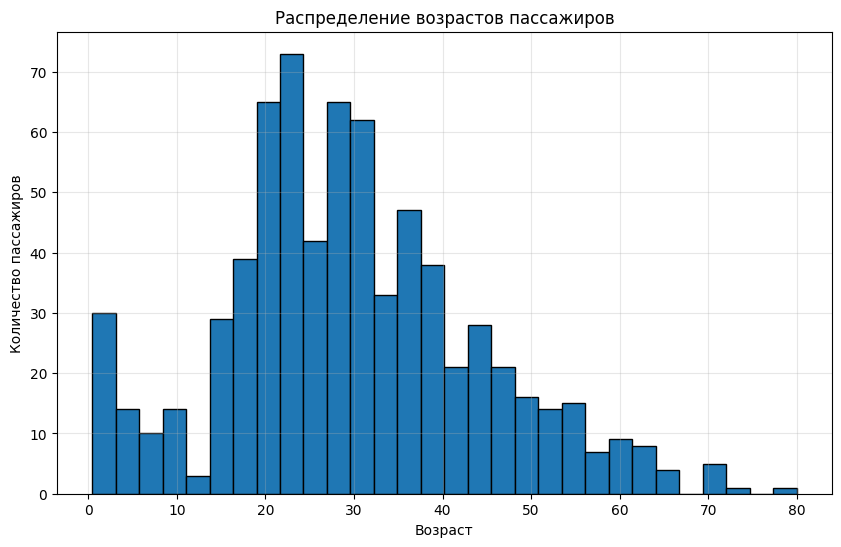

In [24]:
plt.figure(figsize=(10, 6))
plt.hist(df['Age'].dropna(), bins=30, edgecolor='black')
plt.xlabel('Возраст')
plt.ylabel('Количество пассажиров')
plt.title('Распределение возрастов пассажиров')
plt.grid(alpha=0.3)
plt.show()

2. Постройте гистограммы распределения цен для пассажиров разных классов

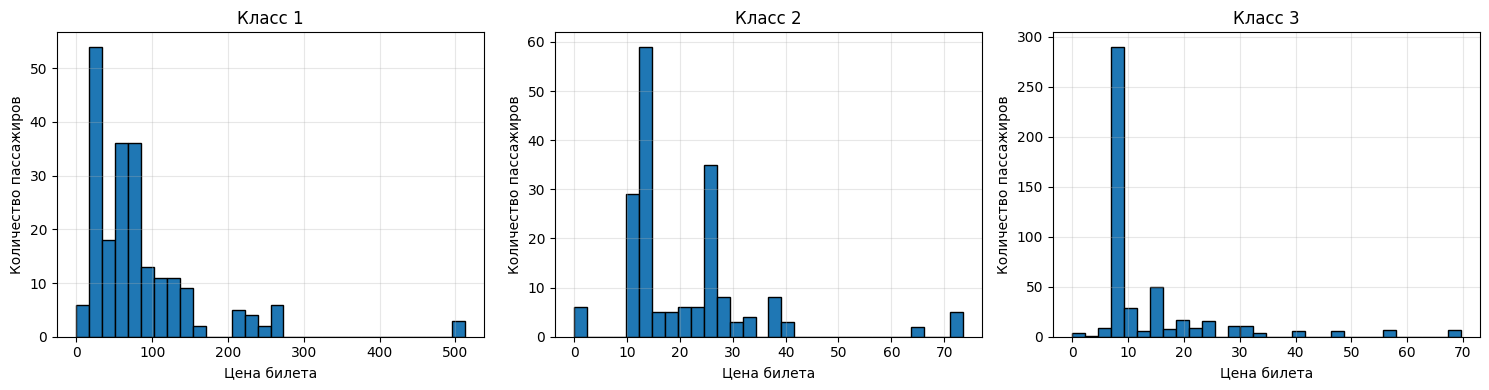

In [25]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
for i, pclass in enumerate([1, 2, 3]):
    axes[i].hist(df[df['Pclass'] == pclass]['Fare'], bins=30, edgecolor='black')
    axes[i].set_xlabel('Цена билета')
    axes[i].set_ylabel('Количество пассажиров')
    axes[i].set_title(f'Класс {pclass}')
    axes[i].grid(alpha=0.3)
plt.tight_layout()
plt.show()

3. Постройте зависимость цены от возраста пассажира

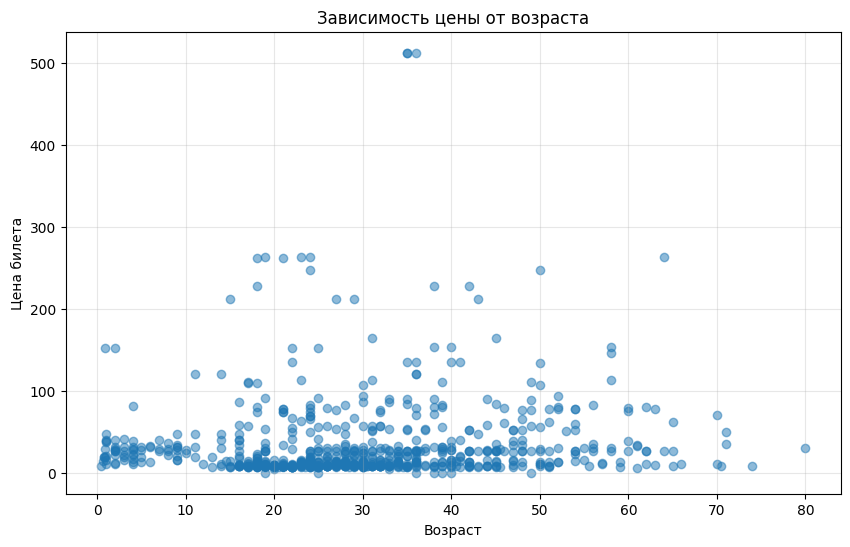

In [26]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Age'], df['Fare'], alpha=0.5)
plt.xlabel('Возраст')
plt.ylabel('Цена билета')
plt.title('Зависимость цены от возраста')
plt.grid(alpha=0.3)
plt.show()

4. Постройте box plot отображающий распределение цен на билеты в разных классах

<Figure size 1000x600 with 0 Axes>

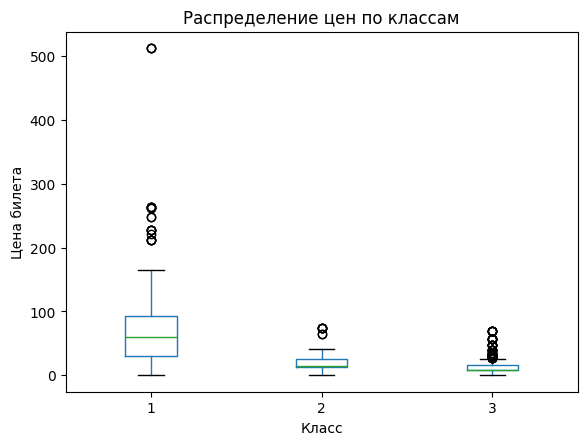

In [27]:
plt.figure(figsize=(10, 6))
df.boxplot(column='Fare', by='Pclass', grid=False)
plt.xlabel('Класс')
plt.ylabel('Цена билета')
plt.title('Распределение цен по классам')
plt.suptitle('')
plt.show()

5. Визуализируйте распределение долей выживших среди мужчин, женщин и детей(до 16 лет)

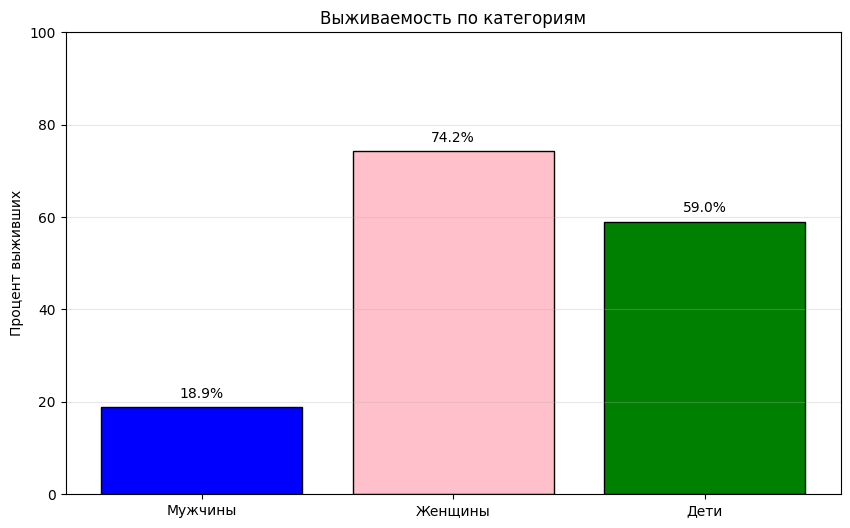

In [28]:
categories = ['Мужчины', 'Женщины', 'Дети']
survival_rates = [
    df[df['Sex'] == 'male']['Survived'].mean() * 100,
    df[df['Sex'] == 'female']['Survived'].mean() * 100,
    df[df['Age'] < 16]['Survived'].mean() * 100
]
plt.figure(figsize=(10, 6))
plt.bar(categories, survival_rates, color=['blue', 'pink', 'green'], edgecolor='black')
plt.ylabel('Процент выживших')
plt.title('Выживаемость по категориям')
plt.ylim(0, 100)
plt.grid(axis='y', alpha=0.3)
for i, v in enumerate(survival_rates):
    plt.text(i, v + 2, f'{v:.1f}%', ha='center')
plt.show()

6. Сравните плотности распределения возростов выживших и умерших пассажиров, сделайте выводы

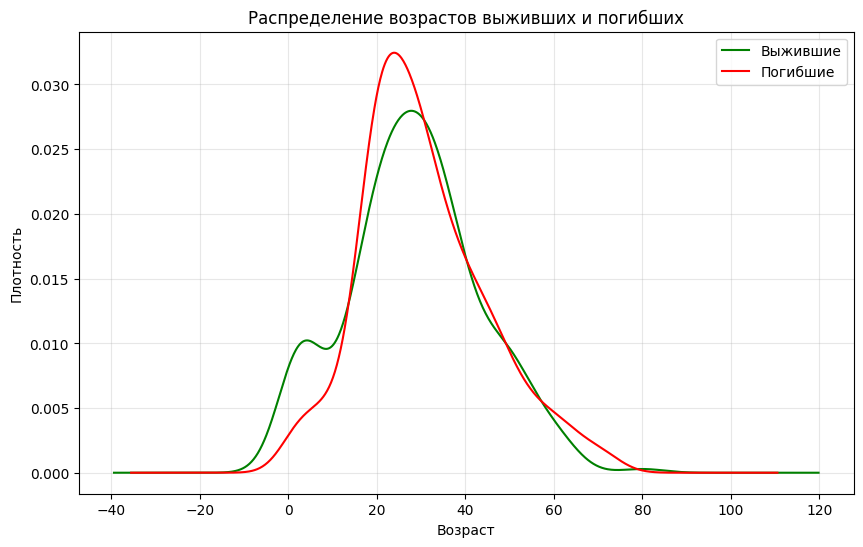

Вывод: Среди выживших больше молодых людей, среди погибших - более равномерное распределение


In [29]:
plt.figure(figsize=(10, 6))
df[df['Survived'] == 1]['Age'].plot(kind='density', label='Выжившие', color='green')
df[df['Survived'] == 0]['Age'].plot(kind='density', label='Погибшие', color='red')
plt.xlabel('Возраст')
plt.ylabel('Плотность')
plt.title('Распределение возрастов выживших и погибших')
plt.legend()
plt.grid(alpha=0.3)
plt.show()
print("Вывод: Среди выживших больше молодых людей, среди погибших - более равномерное распределение")

7. Постройте круговую диаграмму отображающую выживаемость мужчин и женщин в разных классах обслуживания(визуализация должна быть интуитивно понятная без объяснений, женщины и мужчины соответствующих классов объеденены визуально в одну группу и 2 подгруппы)*

\* Задание на доп. балл

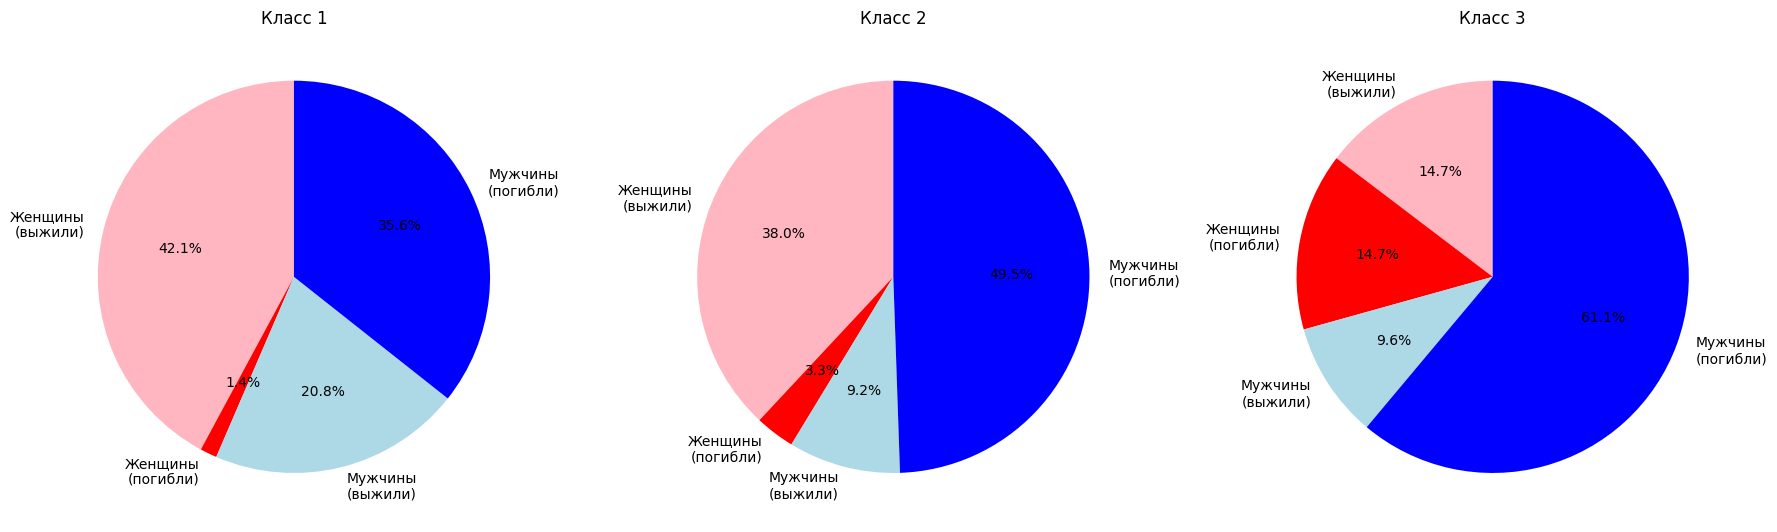

In [31]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
for i, pclass in enumerate([1, 2, 3]):
    class_data = df[df['Pclass'] == pclass]
    survival_data = [
        len(class_data[(class_data['Sex'] == 'female') & (class_data['Survived'] == 1)]),
        len(class_data[(class_data['Sex'] == 'female') & (class_data['Survived'] == 0)]),
        len(class_data[(class_data['Sex'] == 'male') & (class_data['Survived'] == 1)]),
        len(class_data[(class_data['Sex'] == 'male') & (class_data['Survived'] == 0)])
    ]
    labels = ['Женщины\n(выжили)', 'Женщины\n(погибли)', 'Мужчины\n(выжили)', 'Мужчины\n(погибли)']
    colors = ['lightpink', 'red', 'lightblue', 'blue']
    axes[i].pie(survival_data, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90)
    axes[i].set_title(f'Класс {pclass}')
plt.tight_layout()
plt.show()